# Clustering and PCA Assignment

**Problem Statement**<br>
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. 

Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most. 

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#Improting the PCA module
from sklearn.decomposition import PCA

### Reading the Data Set

In [3]:
#reading Dataset
countries = pd.read_csv("Country-data.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)
countries.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [4]:
#Sanity Check
print(countries.shape)
print(countries.describe())
countries.info()

(167, 10)
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1

In [5]:
# We don't have any missing values. Lets proceed with PCA

In [6]:
countries_pca = countries.drop('country',axis = 1)

# PCA:

In [7]:
pca = PCA(svd_solver='randomized', random_state=42)

In [8]:
#Before we apply PCA, Lets do normalization of the variables. 
countries_norm=(countries_pca-countries_pca.mean())/countries_pca.std()
countries_norm.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692


In [9]:
#Doing the PCA on the countries
pca.fit(countries_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [10]:
#Lets plot the PCA to see how it has created the components

In [11]:
colnames = list(countries_norm.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pca_df

,PC1,PC2,Feature
0,-0.419519,0.192884,child_mort
1,0.283897,0.613163,exports
2,0.150838,-0.243087,health
3,0.161482,0.671821,imports
4,0.398441,0.022536,income
5,-0.193173,-0.008404,inflation
6,0.425839,-0.222707,life_expec
7,-0.403729,0.155233,total_fer
8,0.392645,-0.046022,gdpp


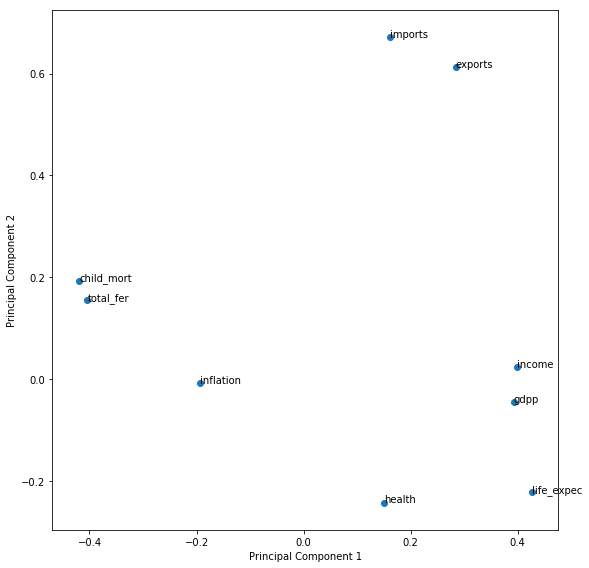

In [12]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

#### Looks like the PCA1 was high on income,gdpp and life_expec. While PCA2 was high on imports, and exports.

#### Looking at the screeplot to assess the number of needed principal components

In [13]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

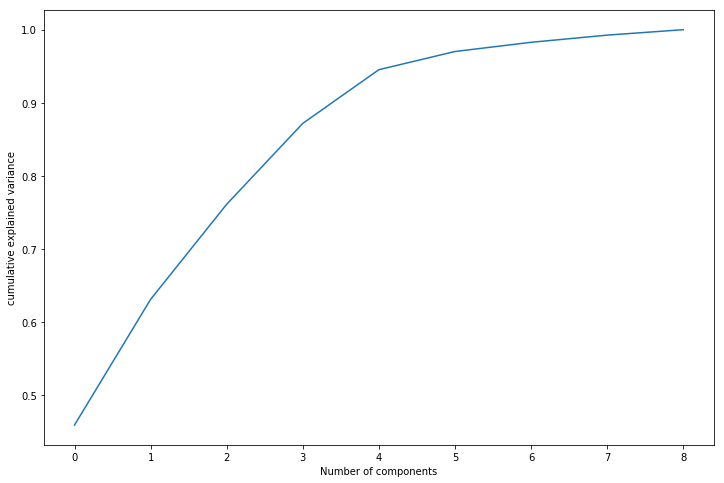

In [14]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 4 principal components can explain 95% of the variance. So Lets build the model using 4 components

In [15]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [16]:
df_pca = pca_final.fit_transform(countries_norm)
df_pca.shape

(167, 4)

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [17]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

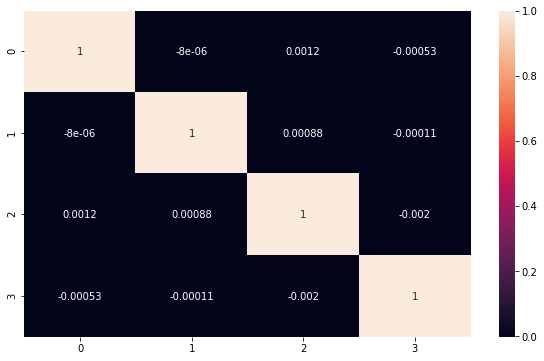

In [18]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,6))
sns.heatmap(corrmat,annot = True)

In [19]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.0011961925092542815 , min corr:  -0.0020378295355501647


#### Since there are no correlation between the components, it means we have a good PCA.

In [20]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3
0,-2.905050,0.088089,0.718841,0.993710
1,0.428070,-0.586096,0.320090,-1.167681
2,-0.282140,-0.445318,-1.221462,-0.847578
3,-2.922180,1.694341,-1.517172,0.873340
4,1.028893,0.130097,0.192344,-0.842275


#### Applying K-means Clustering on our Principal Components. Befor we do, lets do a Hopkins Statistics to see how well our PCA can be clustered

## Hopkins Statistics:
- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [21]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [22]:
hopkins(df_pca)

0.8339919884478463

### Lets do a Silhoutte Analysis to decide on the number of K

## Silhouette Analysis

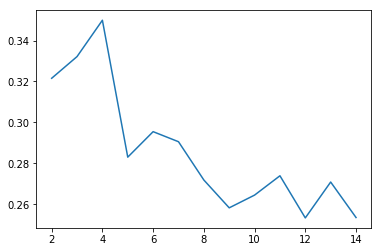

In [23]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_pca)
    sse_.append([k, silhouette_score(df_pca, kmeans.labels_)])

plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

From above it is clear to use 4 number of clusters. But lets do another metric called sum squared of distance to decide on the number of K

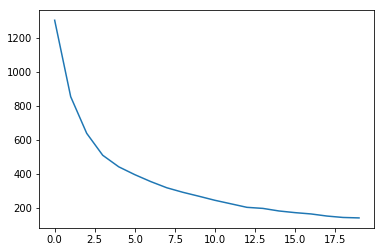

In [24]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

### Even this statistics is pointing near 4. So lets select 4 number of clusters for our model 

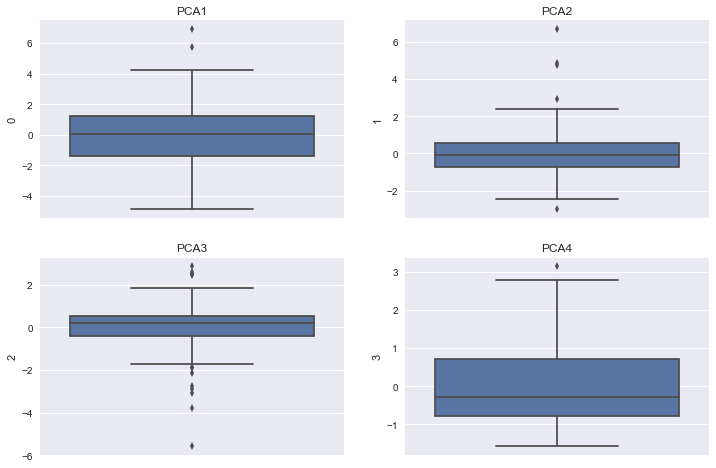

In [25]:
#Checking for any outliers in PCA components

# subplot 1
sns.set(rc={'figure.figsize':(12,8)})
plt.subplot(2, 2, 1)
plt.title('PCA1')
sns.boxplot(y=df_pca[0])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('PCA2')
sns.boxplot(y=df_pca[1])


# subplot 3
plt.subplot(2, 2, 3)
plt.title('PCA3')
sns.boxplot(y=df_pca[2])

# subplot 4
plt.subplot(2, 2, 4)
plt.title('PCA4')
sns.boxplot(y=df_pca[3])

##### Lets Remove these outliers before we proceed to Clustering

In [26]:
df_pca
df_pca.columns = ['PCA1','PCA2','PCA3','PCA4']
df_pca2 = df_pca

features =  ['PCA1','PCA2','PCA3','PCA4']

for i in features:
    print(df_pca[i].quantile([0.05,0.1,0.2,0.25,0.5,0.75,0.9,0.95,1]))

0.05   -3.072555
0.10   -2.835365
0.20   -1.876231
0.25   -1.379425
0.50    0.024111
0.75    1.220561
0.90    2.453951
0.95    3.095881
1.00    6.897479
Name: PCA1, dtype: float64
0.05   -1.759225
0.10   -1.415603
0.20   -0.954025
0.25   -0.745892
0.50   -0.093160
0.75    0.555224
0.90    1.272509
0.95    1.711014
1.00    6.665328
Name: PCA2, dtype: float64
0.05   -1.728803
0.10   -1.301189
0.20   -0.609157
0.25   -0.414229
0.50    0.193170
0.75    0.512530
0.90    1.064768
0.95    1.460947
1.00    2.848803
Name: PCA3, dtype: float64
0.05   -1.165264
0.10   -1.074363
0.20   -0.884541
0.25   -0.787784
0.50   -0.293065
0.75    0.706946
0.90    1.223247
0.95    1.770400
1.00    3.140754
Name: PCA4, dtype: float64


In [27]:
for i in features:
    Q1 = df_pca[i].quantile(0.25)
    Q3 = df_pca[i].quantile(0.75)
    IQR = Q3 - Q1
    df_pca = df_pca[(df_pca[i] >= Q1 - 1.5*IQR) & (df_pca[i] <= Q3 + 1.5*IQR)]

df_pca.shape

(149, 4)

#### I have removed outliers here, But I will reassign the values to these outliers after Clustering

# K-Means Clustering with PCA:

In [28]:
model_clus4 = KMeans(n_clusters = 4, max_iter=50)
model_clus4.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Centroids of CLusters

In [29]:
centers = np.array(model_clus4.cluster_centers_)
centers

array([[-0.49094177, -0.71769245, -0.45988691, -0.67055976],
       [ 0.69585732,  0.24379521,  0.3212829 , -0.78143897],
       [ 2.56788582, -1.02728561,  0.33560626,  1.00616504],
       [-2.48779103,  0.38058872,  0.10571213,  0.65409078]])

#### Calculating Eucladian Distance and Assigning clusters to the Data

In [30]:
# Euclidean Distance Caculator
def dist(a, b):
    return np.linalg.norm(a - b)
Clusters = []
min_distance = 0
min_index = 0
#clusters = []
for i in range(len(df_pca2.index)):
        min_distance = 10000
        cluster = 10000  
        for j in range(0,4):
            distance = dist(df_pca2.iloc[i].values,centers[j])
            if distance < min_distance:
                cluster = j
                min_distance = distance
        Clusters.append(cluster)
        #cluster = np.argmin(array(distances))        

In [31]:
Clusters = pd.Series(Clusters)
print(Clusters.shape)
Clusters.head(5)

(167,)


0    3
1    1
2    0
3    3
4    1
dtype: int64

In [32]:
countries_pca_km = pd.concat([countries, Clusters], axis=1)

In [33]:
countries_pca_km.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_ID']
countries_pca_km.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,3
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [34]:
# Analysis on Clustering
cluster_id = [0,1,2,3]
feature_dataframe = pd.DataFrame(cluster_id)
feature_dataframe.columns=['cluster_ID']
features = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in features:
    means_i = countries_pca_km.groupby('cluster_ID')[i].mean().to_frame(name=i)
    #print(means_i)
    feature_dataframe = pd.merge(feature_dataframe,means_i,how='inner',left_on='cluster_ID',right_on='cluster_ID')
feature_dataframe

,cluster_ID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,29.352778,27.696917,5.384167,30.504608,11148.611111,12.311278,71.916667,2.648611,5398.222222
1,1,16.046552,55.562069,6.720172,62.577586,16850.344828,4.421017,73.896552,2.056034,9939.241379
2,2,4.825000,49.017857,9.509643,41.671429,47403.571429,2.436286,80.575000,1.820357,47039.285714
3,3,94.857778,28.289111,6.407778,43.026667,3493.177778,11.816111,58.926667,5.038667,1713.377778


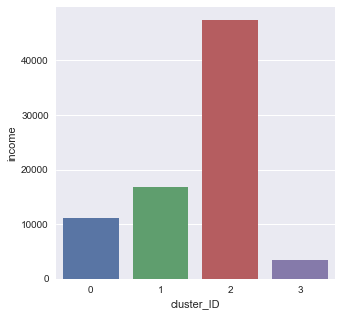

In [35]:
#Plotting Income
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x=feature_dataframe.cluster_ID, y=feature_dataframe.income)

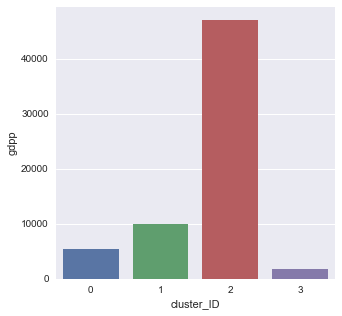

In [36]:
#Plotting GDPP
sns.barplot(x=feature_dataframe.cluster_ID, y=feature_dataframe.gdpp)

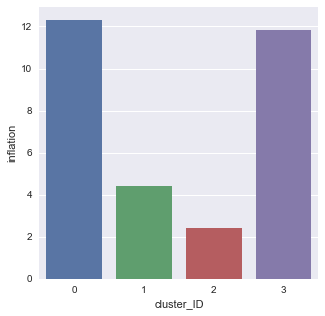

In [37]:
#Plotting inflation
sns.barplot(x=feature_dataframe.cluster_ID, y=feature_dataframe.inflation)

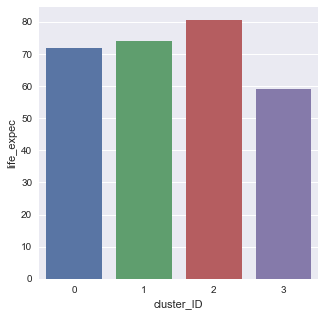

In [38]:
#Plotting Life_Expec
sns.barplot(x=feature_dataframe.cluster_ID, y=feature_dataframe.life_expec)

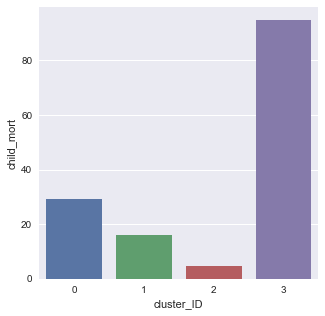

In [39]:
#Plotting child_mort
sns.barplot(x=feature_dataframe.cluster_ID, y=feature_dataframe.child_mort)

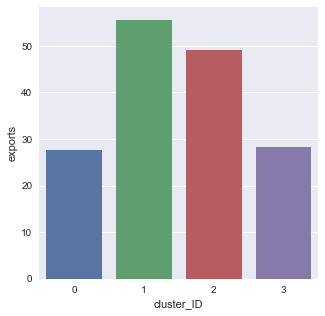

In [40]:
#Plotting exports
sns.barplot(x=feature_dataframe.cluster_ID, y=feature_dataframe.exports)

# Summarising the above plots, we can say that countries in cluster-1 have very low income, GDPP and exports. They also have reasonably low rate of life expectancy. They have tremendoulsy high rate of child mortality and inflation. So that CEO of HELP International should focus on the countries in Cluster-1.

In [41]:
countries_pca_km[countries_pca_km['cluster_ID']==1].head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,1
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,1
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,1
14,Belarus,5.5,51.4,5.61,64.5,16200,15.100,70.4,1.49,6030,1
16,Belize,18.8,58.2,5.20,57.5,7880,1.140,71.4,2.71,4340,1
18,Bhutan,42.7,42.5,5.20,70.7,6420,5.990,72.1,2.38,2180,1
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610,1
24,Bulgaria,10.8,50.2,6.87,53.0,15300,1.110,73.9,1.57,6840,1


In [42]:
countries_pca_km.to_csv('Country PCA KM.csv')

Some of the Countries in this cluster are Afghanistan, Angola, Benin, Burundi, Central Africa

### Now lets do K-means and Hierarchical Clustering on the original Socio-economic and Health Factors  and compare results with PCA

In [43]:
countries.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [44]:
countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [45]:
# We know outliers have huge impact Clusttering algortithms and taking care of these should be the first priority

In [46]:
### Lets start with income as the Standard Deviaiton is huge for this.
countries_kmeans = countries.drop('country',axis=1)
countries_kmeans.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [47]:
countries_kmeans2 = countries_kmeans
features = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

for i in features:
    print(countries_kmeans[i].quantile([0,0.05,0.1,0.25,0.50,0.75,0.9,0.95,1.0]))

0.00      2.60
0.05      3.46
0.10      4.20
0.25      8.25
0.50     19.30
0.75     62.10
0.90    100.22
0.95    116.00
1.00    208.00
Name: child_mort, dtype: float64
0.00      0.109
0.05     12.120
0.10     15.660
0.25     23.800
0.50     35.000
0.75     51.350
0.90     70.800
0.95     80.570
1.00    200.000
Name: exports, dtype: float64
0.00     1.810
0.05     2.791
0.10     3.726
0.25     4.920
0.50     6.320
0.75     8.600
0.90    10.940
0.95    11.570
1.00    17.900
Name: health, dtype: float64
0.00      0.0659
0.05     18.1300
0.10     22.5200
0.25     30.2000
0.50     43.3000
0.75     58.7500
0.90     75.4200
0.95     81.1400
1.00    174.0000
Name: imports, dtype: float64
0.00       609.0
0.05      1213.0
0.10      1524.0
0.25      3355.0
0.50      9960.0
0.75     22800.0
0.90     41220.0
0.95     48290.0
1.00    125000.0
Name: income, dtype: float64
0.00     -4.2100
0.05      0.1834
0.10      0.5878
0.25      1.8100
0.50      5.3900
0.75     10.7500
0.90     16.6400
0.95     2

In [48]:
features = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

for i in features:
    Q1 = countries_kmeans[i].quantile(0.25)
    Q3 = countries_kmeans[i].quantile(0.75)
    IQR = Q3 - Q1
    countries_kmeans = countries_kmeans[(countries_kmeans[i] >= Q1 - 1.5*IQR) & (countries_kmeans[i] <= Q3 + 1.5*IQR)]

In [49]:
countries_kmeans.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,39.634400,37.439992,6.312160,45.272527,10649.448000,7.484360,69.421600,3.046720,5843.616000
std,33.933367,18.954847,2.217736,17.840654,9327.974819,6.145051,7.279684,1.468876,6135.677861
min,3.200000,0.109000,1.970000,0.065900,609.000000,-1.430000,52.000000,1.230000,231.000000
25%,13.800000,22.800000,4.860000,31.400000,3060.000000,2.380000,64.000000,1.860000,1290.000000
50%,24.100000,33.200000,6.000000,43.700000,8430.000000,6.100000,71.300000,2.600000,3650.000000
75%,62.200000,50.500000,7.760000,58.100000,15400.000000,11.100000,75.500000,4.270000,8200.000000
max,137.000000,86.900000,11.800000,92.600000,45400.000000,23.600000,80.400000,6.550000,28000.000000


In [50]:
countries_kmeans.shape

(125, 9)

In [51]:
## Normalize the dataset

In [52]:
countries_norm1=(countries_kmeans-countries_kmeans.mean())/countries_kmeans.std()
countries_norm1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.490144,-1.447650,0.571682,-0.020881,-0.969069,0.318246,-1.816233,1.888028,-0.862271
1,-0.678813,-0.498025,0.107245,0.186511,-0.077128,-0.487280,0.944876,-0.950876,-0.285806
2,-0.363489,0.050647,-0.965922,-0.777580,0.241269,1.402045,0.972350,-0.106694,-0.225503
3,2.338866,1.311538,-1.561124,-0.132984,-0.509162,2.427260,-1.280495,2.119498,-0.377076
4,-0.864471,0.425221,-0.127229,0.763844,0.905936,-0.983614,1.013560,-0.624096,1.035971


In [53]:
countries_norm2=(countries_kmeans2-countries_kmeans.mean())/countries_kmeans.std()
countries_norm2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.490144,-1.447650,0.571682,-0.020881,-0.969069,0.318246,-1.816233,1.888028,-0.862271
1,-0.678813,-0.498025,0.107245,0.186511,-0.077128,-0.487280,0.944876,-0.950876,-0.285806
2,-0.363489,0.050647,-0.965922,-0.777580,0.241269,1.402045,0.972350,-0.106694,-0.225503
3,2.338866,1.311538,-1.561124,-0.132984,-0.509162,2.427260,-1.280495,2.119498,-0.377076
4,-0.864471,0.425221,-0.127229,0.763844,0.905936,-0.983614,1.013560,-0.624096,1.035971


In [54]:
# Lets check the Hopkins Statistics
hopkins(countries_norm1)

0.7580632998352334

In [55]:
# Lets do a CLuster with K=4 as we found out before

In [56]:
# Kmeans with K=4
Kmeans_clus4 = KMeans(n_clusters = 4, max_iter=50)
Kmeans_clus4.fit(countries_norm1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [57]:
centers = np.array(Kmeans_clus4.cluster_centers_)
centers

array([[ 1.39454131, -0.53587057, -0.13412515, -0.26338708, -0.86930234,
         0.39537677, -1.2295879 ,  1.36041394, -0.77092467],
       [-0.29659302, -0.53989841, -0.4105509 , -1.0154895 ,  0.03976054,
         0.54802471,  0.36105961, -0.3828686 , -0.10192017],
       [-0.47414688,  0.37193694,  0.26179406,  0.79537289, -0.17631887,
        -0.44411915,  0.26421475, -0.42070931, -0.22682351],
       [-0.93098757,  0.9304321 ,  0.30500094,  0.36213953,  1.68648658,
        -0.57708502,  0.97169572, -0.85426874,  1.82580877]])

In [58]:
# Euclidean Distance Caculator
Clusters = []
min_distance = 0
min_index = 0
#clusters = []
for i in range(len(countries_norm2.index)):
        min_distance = 10000
        cluster = 10000  
        for j in range(0,4):
            distance = dist(countries_norm2.iloc[i].values,centers[j])
            if distance < min_distance:
                cluster = j
                min_distance = distance
        Clusters.append(cluster)
        #cluster = np.argmin(array(distances))        

In [59]:
Clusters = pd.Series(Clusters)
print(Clusters.shape)
Clusters.head(5)

(167,)


0    0
1    2
2    1
3    0
4    3
dtype: int64

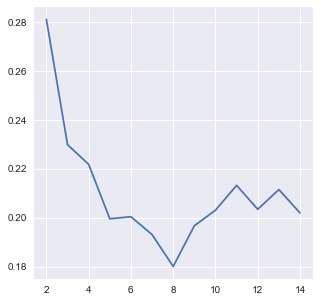

In [60]:
## Silhouette Analysis
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(countries_norm1)
    sse_.append([k, silhouette_score(countries_norm1, kmeans.labels_)])
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

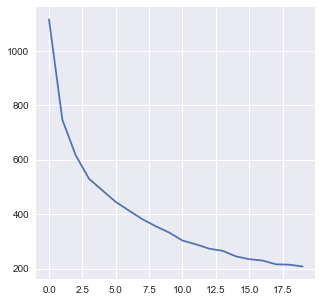

In [61]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(countries_norm1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [62]:
# In Both cases, 4 cluster seemed suitable.

In [63]:
# Lets do the same Analysis which we did before using the new model

In [64]:
# analysis of clusters formed
countries_km = pd.concat([countries, Clusters], axis=1)
countries_km.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_ID']
countries_km.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,3
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,3
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,3
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1


In [65]:
cluster_id = [0,1,2,3]
feature_dataframe1 = pd.DataFrame(cluster_id)
feature_dataframe1.columns=['cluster_ID']
features = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in features:
    means_i = countries_km.groupby('cluster_ID')[i].mean().to_frame(name=i)
    #print(means_i)
    feature_dataframe1 = pd.merge(feature_dataframe1,means_i,how='inner',left_on='cluster_ID',right_on='cluster_ID')
feature_dataframe1

,cluster_ID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,96.506977,27.516512,6.231395,41.927907,3158.441860,12.330814,59.183721,5.114651,1507.209302
1,1,29.071875,27.855906,5.387500,27.780184,11088.125000,12.833125,71.971875,2.488750,5396.812500
2,2,23.946341,43.978049,7.070976,59.987805,8866.585366,4.731927,71.200000,2.453902,4413.073171
3,3,6.454902,58.578431,7.999216,52.535294,39392.156863,3.228863,78.737255,1.806471,34246.470588


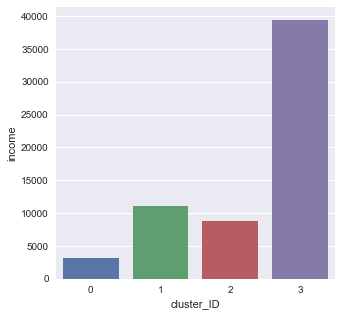

In [66]:
#Plotting Income
sns.barplot(x=feature_dataframe1.cluster_ID, y=feature_dataframe1.income)

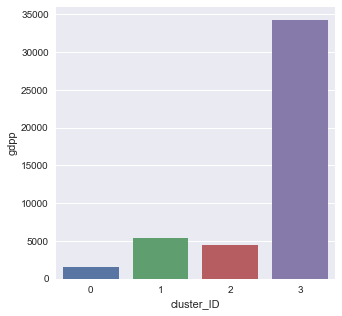

In [67]:
#Plotting GDPP
sns.barplot(x=feature_dataframe1.cluster_ID, y=feature_dataframe1.gdpp)

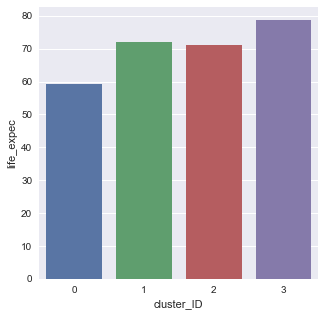

In [68]:
#Plotting Life_Expec
sns.barplot(x=feature_dataframe1.cluster_ID, y=feature_dataframe1.life_expec)

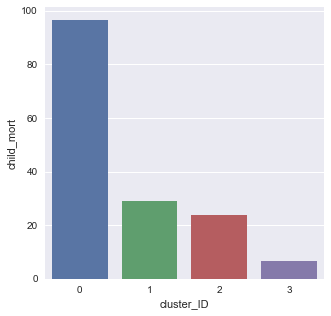

In [69]:
#Plotting child_mort
sns.barplot(x=feature_dataframe1.cluster_ID, y=feature_dataframe1.child_mort)

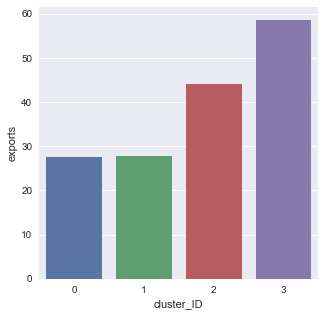

In [70]:
#Plotting exports
sns.barplot(x=feature_dataframe1.cluster_ID, y=feature_dataframe1.exports)

### Similar to what we saw during K-means Clustering of PCA, CEO should focus the countries in Cluster-ID. Lets look at some of the countries in this cluster

In [71]:
countries_km[countries_km['cluster_ID']==1].head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,1
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840,1
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.14,70.4,2.33,758,1
19,Bolivia,46.6,41.2,4.84,34.3,5410,8.78,71.6,3.20,1980,1
22,Brazil,19.8,10.7,9.01,11.8,14500,8.41,74.2,1.80,11200,1
34,China,15.7,26.3,5.07,22.6,9530,6.94,74.6,1.59,4560,1
35,Colombia,18.6,15.9,7.59,17.8,10900,3.86,76.4,2.01,6250,1
45,Dominican Republic,34.4,22.7,6.22,33.3,11100,5.44,74.6,2.60,5450,1


In [72]:
countries_km.to_csv('Country_Kmeans.csv')

## Same countries Afghanistan, Angola, Benin , Burundi and Central Africa appear here too

## Heirarchical Clustering

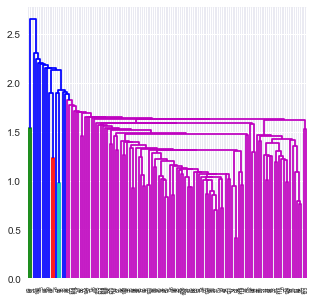

In [73]:
# heirarchical clustering
mergings = linkage(countries_norm1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

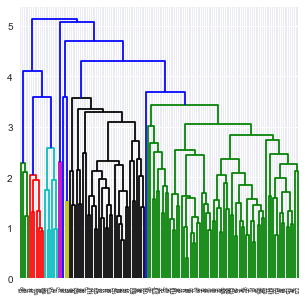

In [74]:
mergings = linkage(countries_norm1, method = "average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [75]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))

In [76]:
countries_hc = pd.concat([countries, clusterCut], axis=1)
countries_hc.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_ID']
countries_hc.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0.0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0.0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0.0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0.0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2.0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,2.0


In [77]:
cluster_id = [0,1,2,3]
feature_dataframe2 = pd.DataFrame(cluster_id)
feature_dataframe2.columns=['cluster_ID']
features = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in features:
    means_i = countries_hc.groupby('cluster_ID')[i].mean().to_frame(name=i)
    #print(means_i)
    feature_dataframe2 = pd.merge(feature_dataframe2,means_i,how='inner',left_on='cluster_ID',right_on='cluster_ID')
feature_dataframe2

,cluster_ID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,40.741748,40.459214,6.540680,46.306465,17221.116505,8.186340,70.348544,2.980680,12855.194175
1,1,134.000000,37.050000,3.415000,34.700000,3394.000000,12.205000,53.800000,5.685000,1988.000000
2,2,28.623529,41.205882,7.957059,49.023529,19150.588235,3.475471,72.417647,2.431765,16417.529412
3,3,20.833333,51.966667,7.406667,60.600000,12826.666667,5.300000,73.866667,2.763333,6536.666667


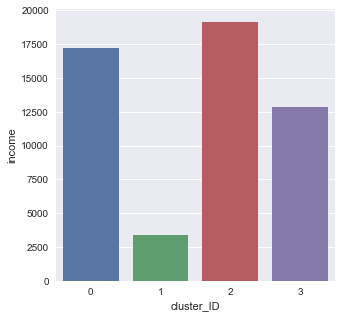

In [78]:
#Plotting Income
sns.barplot(x=feature_dataframe2.cluster_ID, y=feature_dataframe2.income)

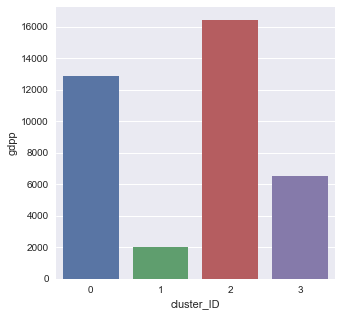

In [79]:
#Plotting GDPP
sns.barplot(x=feature_dataframe2.cluster_ID, y=feature_dataframe2.gdpp)

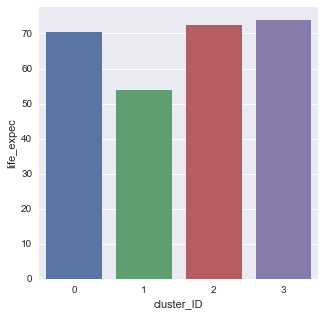

In [80]:
#Plotting Life_Expec
sns.barplot(x=feature_dataframe2.cluster_ID, y=feature_dataframe2.life_expec)

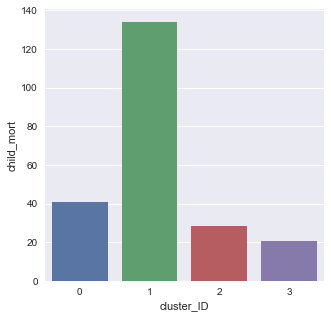

In [81]:
#Plotting child_mort
sns.barplot(x=feature_dataframe2.cluster_ID, y=feature_dataframe2.child_mort)

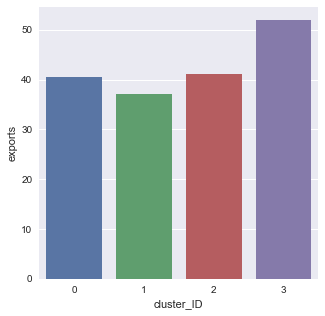

In [82]:
#Plotting exports
sns.barplot(x=feature_dataframe2.cluster_ID, y=feature_dataframe2.exports)

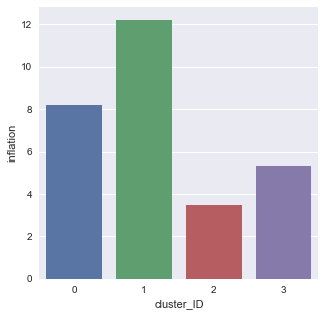

In [83]:
#Plotting inflation
sns.barplot(x=feature_dataframe2.cluster_ID, y=feature_dataframe2.inflation)

CEO should focus on Cluster_ID1 which consists of countries Afghanistan, Benin, Angol, Central African Repbulican

In [85]:
len(countries_pca_km[countries_pca_km['cluster_ID']==1].index)

58

## So Help International Should focus on 58 countries which are in Cluster_1